In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imsave
import numpy as np
import os

# Test

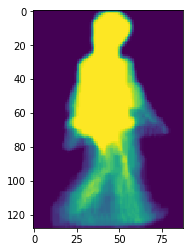

In [2]:
lists = np.ndarray((30,128,88))
path = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq00/1000001'
dirs = os.listdir(path)
dirs = dirs[17:47]

for ii, image in enumerate(dirs):
    lists[ii, :, :] = imread(os.path.join(path, image))
lists = 1/30*np.sum(lists, axis=0)
plt.imshow(lists)

# Create GEI function

In [3]:
import cv2

def generate_GEI(image_list):
    N = len(image_list)
    GEI_image = 1/N*np.sum(image_list, axis=0)
    
    return GEI_image

# Read CSV

In [4]:
from numpy import genfromtxt
import numpy as np
import os

IDList_A_55_probe = genfromtxt('/Users/congcong/Desktop/Gait/OULP-Database/OULP-C1V2_Pack/OULP-C1V2_SubjectIDList(FormatVersion1.0)/IDList_OULP-C1V2-A-55_gallery.csv',
           delimiter=',', dtype=np.int32)
# for row in IDList_A_55_gallery:
#     print(row)

print('length:',len(IDList_A_55_probe))
for row in IDList_A_55_probe:
    print(row)

length: 3714
[24  0 61 92]
[35  0 58 89]
[36  0 26 58]
[37  0 10 41]
[38  0 48 78]
[39  0 43 77]
[40  0 53 83]
[41  0 49 77]
[42  0 44 74]
[43  0 42 74]
[44  0 52 83]
[45  0 44 73]
[46  0 61 91]
[ 47   0  79 110]
[48  0 36 67]
[49  0 64 96]
[50  0 57 87]
[51  0 65 95]
[52  0 56 85]
[53  0 53 82]
[ 54   0  72 105]
[ 55   0  85 118]
[56  0 36 68]
[57  0 68 99]
[58  0 49 79]
[59  0 58 89]
[ 60   0  77 108]
[61  0 69 99]
[62  0 65 93]
[ 63   0  87 119]
[ 64   0  71 101]
[65  0 49 80]
[66  0 50 85]
[ 67   0  85 118]
[68  0 63 93]
[69  0 60 89]
[70  0 55 83]
[71  0 66 98]
[ 72   0  70 100]
[ 73   0  79 110]
[ 74   0  79 112]
[75  0 53 85]
[1000001       0      85     114]
[1000002       0     114     145]
[1000003       0      55      79]
[1000004       0      33      63]
[1000005       0      94     126]
[1000006       0      65      96]
[1000007       0      49      77]
[1000008       0      78     104]
[1000009       0      40      67]
[1000015       0      77     110]
[1000016       0   

# Define function generate_image_list

In [5]:
def generate_image_list(folder_path, csv_file, n_frames):
    for subject in csv_file:
        images_list = np.ndarray((n_frames, 224, 224))
        
        subject_dir = str(subject[0])
        if len(subject_dir) != 7:
            subject_dir = '0' * (7 - len(subject_dir)) + subject_dir
                
        for ii, image_name in enumerate(range(subject[2], subject[2] + n_frames)):
            image_name = str(image_name)
            if len(image_name) == 2:
                image_name = '0' + image_name 
            elif len(image_name) == 1:
                image_name = '00' + image_name
            images_list[ii, :, :] = imread(os.path.join(folder_path, subject_dir, '00000{}.png'.format(image_name)))
            
        yield (images_list, subject_dir)

# Define function generate_gait_cycle_list

In [47]:
def generate_gait_cycle_list(folder_path, csv_file):
    for subject in csv_file:
        images_list = np.ndarray((subject[3] - subject[2] + 1, 224, 224))
    
        subject_dir = str(subject[0])
        if len(subject_dir) != 7:
            subject_dir = '0' * (7 - len(subject_dir)) + subject_dir
                
        for ii, image_name in enumerate(range(subject[2], subject[3]+1)):
            image_name = str(image_name)
            if len(image_name) == 2:
                image_name = '0' + image_name
            elif len(image_name) == 1:
                image_name = '00' + image_name
            images_list[ii, :, :] = imread(os.path.join(folder_path, subject_dir, '00000{}.png'.format(image_name)))
            
        yield (images_list, subject_dir)

In [7]:
def generate_save_path(folder_path, subject_dir, degree):
    save_path = os.path.join(folder_path, subject_dir, '{}_{}_GEI_10f'.format(subject_dir, str(degree)))
                             
    return save_path

In [9]:
Or_folder_path = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)/Seq00'

image_list_tuple = generate_image_list(Or_folder_path, IDList_A_55_probe, 8)

New_folder_path = 'OULP-C1V2_Pack/OULP-GEI-(224x224)-8f/Seq00'

for ii in range(len(IDList_A_55_probe)):
    next_input = next(image_list_tuple)
    
    GEI = generate_GEI(next_input[0])
    
    save_path = generate_save_path(New_folder_path, next_input[1], 55)
    
    os.makedirs(os.path.join(New_folder_path, next_input[1]))
    if os.path.isdir(os.path.join(New_folder_path, next_input[1])):
        imsave('{}.png'.format(save_path), GEI)
    else:
        continue

TypeError: float() argument must be a string or a number, not 'PngImageFile'

In [331]:
next_input = next(image_list_tuple)
GEI = generate_GEI(next_input[0])
print(next_input[1])
plt.imshow(GEI)

StopIteration: 

# Get rid of incomplete GEI data

In [10]:
import shutil

target_path = '/Users/congcong/Desktop/Gait/OULP-Database/OULP-C1V2_Pack/OULP-GEI-(224x224)-15f/Seq01'
subject_list = os.listdir(target_path)
for subject in subject_list:
    if subject != '.DS_Store':
        subject_path = os.path.join(target_path, subject)
        
        if len(os.listdir(subject_path)) != 4:
            shutil.rmtree('{}'.format(subject_path))